In [192]:
import psycopg2

import pandas as pd
import numpy as np
import pandas_ta as ta

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

## Модель для предсказания акций IBM

In [229]:
model_IBM = load_model('LSTM_IBM_NICE (2).h5')  # Загрузка модели

In [230]:
# Получение данных из БД
connection = psycopg2.connect(
  user="postgres", password="129053", host="localhost", port="5000", database="data_mart")
cursor = connection.cursor()

watch_back = 40

query = f"SELECT * FROM companies_data WHERE \"Name\" = 'International Business Machines Corp' LIMIT {watch_back};"
cursor.execute(query)

results = cursor.fetchall()
columns = ['Date_point', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.DataFrame([x for x in results], columns=columns)
df['Date_point'] = pd.to_datetime(df['Date_point'])
print(df)

   Date_point                                  Name    Open      High  \
0  2018-12-31  International Business Machines Corp  113.33  114.3500   
1  2018-12-28  International Business Machines Corp  114.22  114.8000   
2  2018-12-27  International Business Machines Corp  109.99  113.7800   
3  2018-12-26  International Business Machines Corp  108.00  111.3900   
4  2018-12-24  International Business Machines Corp  109.90  111.0000   
5  2018-12-21  International Business Machines Corp  112.50  115.2800   
6  2018-12-20  International Business Machines Corp  115.70  116.4500   
7  2018-12-19  International Business Machines Corp  117.15  120.2700   
8  2018-12-18  International Business Machines Corp  116.90  118.2300   
9  2018-12-17  International Business Machines Corp  119.07  119.7800   
10 2018-12-14  International Business Machines Corp  119.50  121.1100   
11 2018-12-13  International Business Machines Corp  121.26  121.7900   
12 2018-12-12  International Business Machines Corp

In [231]:
predict_data = df[['Open', 'High', 'Low', 'Close', 'Volume']]
print(predict_data.shape)

(40, 5)


In [232]:
predict_data.head(5)

,Open,High,Low,Close,Volume
0,113.33,114.35,112.4201,113.67,4982755.0
1,114.22,114.80,112.5000,113.03,5117533.0
2,109.99,113.78,109.4700,113.78,6045590.0
3,108.00,111.39,105.9400,111.39,6645794.0
4,109.90,111.00,107.5000,107.57,3821376.0


In [233]:
np_predict_data = np.array(predict_data)
np_predict_data = np_predict_data.reshape((1, watch_back, 5))

In [234]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler(feature_range=(0,1))
np_predict_data_tmp = np_predict_data.reshape(-1, np_predict_data.shape[-1])
scaled_predict = normalizer.fit_transform(np_predict_data_tmp)
x_train = scaled_predict.reshape(np_predict_data.shape)

In [235]:
x_train

array([[[0.3016412 , 0.21488133, 0.35179696, 0.34385569, 0.23450452],
        [0.35200905, 0.24374599, 0.35613464, 0.30777903, 0.24644022],
        [0.11262026, 0.17831944, 0.19163952, 0.35005637, 0.32862735],
        [0.        , 0.02501604, 0.        , 0.21533258, 0.38178038],
        [0.10752688, 0.        , 0.08469055, 0.        , 0.1316548 ],
        [0.25466893, 0.27453496, 0.24429967, 0.18996618, 0.71304667],
        [0.43576684, 0.34958307, 0.31270358, 0.30721533, 0.54194297],
        [0.51782683, 0.59461193, 0.54451683, 0.4994363 , 0.41136141],
        [0.50367855, 0.46375882, 0.54723127, 0.51183766, 0.35028835],
        [0.62648557, 0.56318153, 0.49565689, 0.48083427, 0.44631119],
        [0.6508206 , 0.64849262, 0.73289902, 0.69503946, 0.19655278],
        [0.75042445, 0.69211033, 0.77252986, 0.74182638, 0.14690639],
        [0.82116582, 0.76202694, 0.81758958, 0.76606539, 0.10857775],
        [0.86304471, 0.82168056, 0.76330076, 0.75084555, 0.23984688],
        [0.66440294,

In [236]:
results = model_IBM.predict(x_train)
# results = model_IBM.predict(normalize_predict_data)

1/1 [==============================] - 2s 2s/step


In [237]:
results

array([[145.96268, 146.54227, 148.8095 , 147.72115, 146.95464, 147.14288,
        148.53787, 147.74153, 148.20673, 147.57622, 148.49596, 147.91386,
        147.55757, 147.92702, 146.95851, 146.54245, 148.0857 , 146.7042 ,
        147.78087, 148.4306 , 148.30344, 148.27817, 148.50948, 147.94519,
        147.5945 , 147.46075, 149.39047, 147.49438, 148.10779, 147.40306,
        148.42491, 148.51297, 147.88924, 148.76218, 148.6115 , 148.35785,
        148.19966, 148.95763, 148.5499 , 146.812  , 147.94484, 148.01096,
        147.74173, 148.13864, 149.58357, 148.67609, 148.6319 , 147.5649 ,
        146.87222, 148.59502, 149.17274, 150.24385, 147.65443, 147.519  ,
        147.50793, 148.68985, 149.17014, 148.94194, 148.31778, 148.96336,
        150.05606, 147.70361, 149.04156, 149.27077, 150.18071, 149.2823 ,
        149.34702, 148.25151, 150.088  , 149.71056, 149.60243, 149.52115,
        150.48099, 149.41597, 149.70195, 150.13673, 150.68889, 150.60608,
        149.8807 , 149.8118 , 150.1539

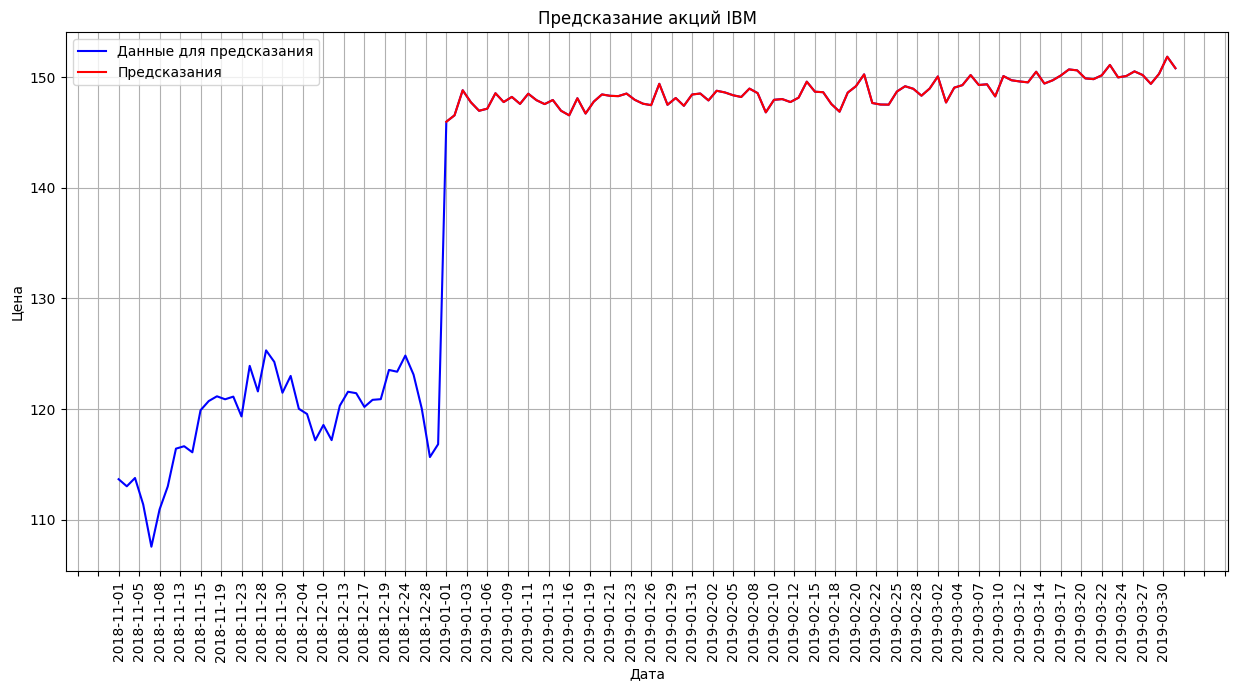

In [238]:

dates_df = df['Date_point']
start_date = dates_df[0]

dates = pd.date_range(start=start_date, periods=91, freq='D')
dates = dates.strftime('%Y-%m-%d').tolist()[1:]

tmp = dates_df.dt.strftime('%Y-%m-%d').tolist()[::-1]

t = []
for i in predict_data['Close']:
  t.append(float(i))
for i in results[0]:
  t.append(float(i))
  
plt.figure(figsize=(15,7)) 
plt.title('Предсказание акций IBM')

plt.plot(tmp+dates, t, color='blue', label='Данные для предсказания')
plt.plot(dates, results[0], color='red', label='Предсказания')

plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(tmp+dates)//2))

plt.gca().set_xlabel('Дата')
plt.gca().set_ylabel('Цена')

plt.grid(True)

plt.legend()
plt.show();

In [239]:
import datetime

query1 = 'INSERT INTO predictions ("company_name", "date_of_predict", "close") VALUES (%s, %s, %s)'
for i in range(len(results[0])):
  name = 'International Business Machines Corp'
  predict_date = datetime.datetime.strptime(dates[i], '%Y-%m-%d')
  close = float(results[0][i])
  cursor.execute(query1, (name, predict_date, close))
connection.commit()

## Модель предсказаний для Yandex

In [240]:
model_Yandex = load_model('LSTM_YANDEX_NICE.h5')  # Загрузка модели

In [241]:
# Получение данных из БД
connection = psycopg2.connect(
  user="postgres", password="129053", host="localhost", port="5000", database="data_mart")
cursor = connection.cursor()

watch_back = 40

query = f"SELECT * FROM companies_data WHERE \"Name\" = 'Yandex' LIMIT {watch_back};"
cursor.execute(query)

results = cursor.fetchall()
columns = ['Date_point', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']
df_yandex = pd.DataFrame([x for x in results], columns=columns)
df_yandex['Date_point'] = pd.to_datetime(df_yandex['Date_point'])
print(df_yandex)

   Date_point    Name   Open     High     Low  Close     Volume
0  2018-12-31  Yandex  28.05  28.2500  27.020  27.35   931225.0
1  2018-12-28  Yandex  27.50  28.4700  27.430  27.91  1437999.0
2  2018-12-27  Yandex  27.00  27.5800  26.710  27.56  1147693.0
3  2018-12-26  Yandex  26.95  27.7900  26.200  27.79  2042321.0
4  2018-12-24  Yandex  26.58  27.3050  26.370  27.08  1575460.0
5  2018-12-21  Yandex  27.23  27.4100  26.350  26.44  2449309.0
6  2018-12-20  Yandex  27.48  27.7400  26.460  27.28  2010765.0
7  2018-12-19  Yandex  27.20  28.3500  27.140  27.26  2336586.0
8  2018-12-18  Yandex  27.69  27.9700  27.080  27.20  2617593.0
9  2018-12-17  Yandex  27.96  28.2900  27.110  27.48  2414061.0
10 2018-12-14  Yandex  27.74  28.5900  27.480  28.01  1848725.0
11 2018-12-13  Yandex  28.56  28.6800  27.860  27.90  1910436.0
12 2018-12-12  Yandex  27.62  28.9400  27.410  28.69  3408083.0
13 2018-12-11  Yandex  28.37  28.4000  26.795  26.85  3729732.0
14 2018-12-10  Yandex  28.56  28.9827  2

In [242]:
predict_data_yandex = df_yandex[['Open', 'High', 'Low', 'Close', 'Volume']]
print(predict_data_yandex.shape)

(40, 5)


In [243]:
predict_data_yandex.head(5)

,Open,High,Low,Close,Volume
0,28.05,28.250,27.02,27.35,931225.0
1,27.50,28.470,27.43,27.91,1437999.0
2,27.00,27.580,26.71,27.56,1147693.0
3,26.95,27.790,26.20,27.79,2042321.0
4,26.58,27.305,26.37,27.08,1575460.0


In [244]:
np_predict_data_yandex = np.array(predict_data_yandex)
np_predict_data_yandex = np_predict_data_yandex.reshape((1, watch_back, 5))

In [245]:
from sklearn.preprocessing import MinMaxScaler

normalizer_yandex = MinMaxScaler(feature_range=(0,1))
np_predict_data_tmp_yandex = np_predict_data_yandex.reshape(-1, np_predict_data_yandex.shape[-1])
scaled_predict_yandex = normalizer_yandex.fit_transform(np_predict_data_tmp_yandex)
x_train_yandex = scaled_predict_yandex.reshape(np_predict_data_yandex.shape)

In [246]:
x_train_yandex

array([[[0.37692308, 0.25099602, 0.22651934, 0.21162791, 0.0127756 ],
        [0.23589744, 0.30942895, 0.33977901, 0.34186047, 0.11749945],
        [0.10769231, 0.07304117, 0.14088398, 0.26046512, 0.05750829],
        [0.09487179, 0.12881806, 0.        , 0.31395349, 0.2423814 ],
        [0.        , 0.        , 0.04696133, 0.14883721, 0.1459055 ],
        [0.16666667, 0.02788845, 0.04143646, 0.        , 0.32648467],
        [0.23076923, 0.11553785, 0.0718232 , 0.19534884, 0.23586042],
        [0.15897436, 0.27755644, 0.25966851, 0.19069767, 0.30319069],
        [0.28461538, 0.17662683, 0.24309392, 0.17674419, 0.36126023],
        [0.35384615, 0.26162019, 0.25138122, 0.24186047, 0.31920074],
        [0.2974359 , 0.34130146, 0.35359116, 0.36511628, 0.20237517],
        [0.50769231, 0.36520584, 0.45856354, 0.33953488, 0.21512763],
        [0.26666667, 0.43426295, 0.33425414, 0.52325581, 0.52461343],
        [0.45897436, 0.29083665, 0.16436464, 0.09534884, 0.59108157],
        [0.50769231,

In [247]:
results_yandex = model_Yandex.predict(x_train_yandex)

1/1 [==============================] - 2s 2s/step


In [248]:
results_yandex

array([[27.824932, 27.980564, 28.109001, 27.602932, 27.339718, 28.003584,
        27.713583, 27.33411 , 27.506493, 27.609335, 27.477962, 28.235968,
        28.561647, 28.322153, 27.797937, 27.5558  , 28.047197, 27.785973,
        27.315304, 27.343176, 27.298603, 27.762999, 27.094181, 28.187012,
        27.459057, 27.840532, 27.772606, 27.807579, 26.941402, 27.81739 ,
        27.427988, 27.593105, 27.242403, 27.376413, 27.41579 , 26.690218,
        27.046394, 27.339417, 27.645779, 27.385975, 26.897041, 26.824776,
        26.892002, 27.25619 , 26.787836, 27.380152, 26.935606, 26.711866,
        27.2131  , 27.387152, 27.002907, 26.817877, 26.968887, 26.601805,
        26.497707, 26.939898, 27.080456, 26.895538, 26.639399, 26.83649 ,
        26.886309, 26.645912, 26.482199, 26.705006, 26.821714, 26.318302,
        26.196798, 26.568995, 26.183407, 26.700241, 26.28381 , 25.847097,
        25.968348, 26.213577, 26.189552, 26.182419, 26.200893, 26.190548,
        25.972353, 25.594982, 25.87137

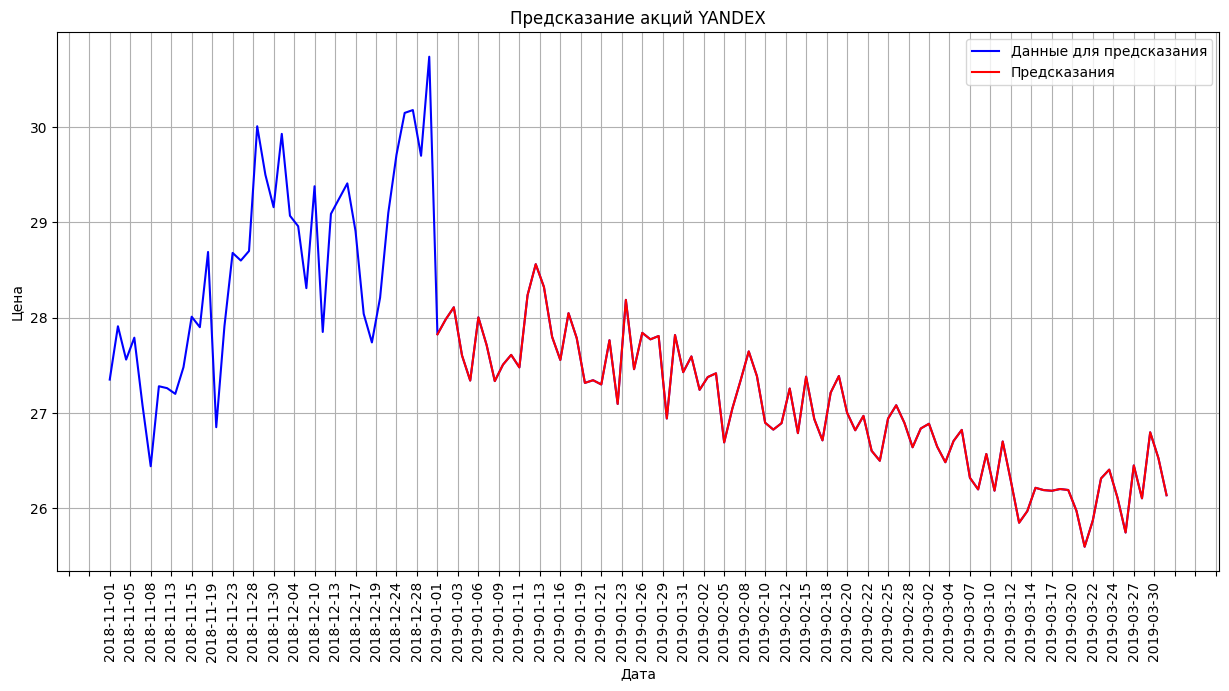

In [249]:
dates_df = df_yandex['Date_point']
start_date = dates_df[0]

dates = pd.date_range(start=start_date, periods=91, freq='D')
dates = dates.strftime('%Y-%m-%d').tolist()[1:]

tmp = dates_df.dt.strftime('%Y-%m-%d').tolist()[::-1]

t = []
for i in predict_data_yandex['Close']:
  t.append(float(i))
for i in results_yandex[0]:
  t.append(float(i))
  
plt.figure(figsize=(15,7)) 
plt.title('Предсказание акций YANDEX')

plt.plot(tmp+dates, t, color='blue', label='Данные для предсказания')
plt.plot(dates, results_yandex[0], color='red', label='Предсказания')

plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(tmp+dates)//2))

plt.gca().set_xlabel('Дата')
plt.gca().set_ylabel('Цена')

plt.grid(True)

plt.legend()
plt.show();

In [250]:
import datetime

query2 = 'INSERT INTO predictions ("company_name", "date_of_predict", "close") VALUES (%s, %s, %s)'
for i in range(len(results_yandex[0])):
  name = 'Yandex'
  predict_date = datetime.datetime.strptime(dates[i], '%Y-%m-%d')
  close = float(results_yandex[0][i])
  cursor.execute(query2, (name, predict_date, close))
connection.commit()

## Модель для MIME

In [251]:
model_Mime = load_model('LSTM_MIME_NICE.h5')  # Загрузка модели

In [252]:
# Получение данных из БД
connection = psycopg2.connect(
  user="postgres", password="129053", host="localhost", port="5000", database="data_mart")
cursor = connection.cursor()

watch_back = 40

query = f"SELECT * FROM companies_data WHERE \"Name\" = 'Mimecast Ltd' LIMIT {watch_back};"
cursor.execute(query)

results = cursor.fetchall()
columns = ['Date_point', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']
df_mime = pd.DataFrame([x for x in results], columns=columns)
df_mime['Date_point'] = pd.to_datetime(df_mime['Date_point'])
print(df_mime)

   Date_point          Name   Open     High      Low  Close     Volume
0  2018-12-31  Mimecast Ltd  33.70  34.0000  33.2300  33.63   192189.0
1  2018-12-28  Mimecast Ltd  33.15  33.8000  31.7300  33.32   266871.0
2  2018-12-27  Mimecast Ltd  31.92  32.7800  31.4900  32.70   266509.0
3  2018-12-26  Mimecast Ltd  31.27  32.5500  31.2700  32.51   404624.0
4  2018-12-24  Mimecast Ltd  29.68  31.0700  29.6647  30.87   327169.0
5  2018-12-21  Mimecast Ltd  33.27  33.2700  29.9000  30.18   843225.0
6  2018-12-20  Mimecast Ltd  32.91  33.6800  31.6200  32.82   341854.0
7  2018-12-19  Mimecast Ltd  32.99  33.9700  32.6700  32.84   393483.0
8  2018-12-18  Mimecast Ltd  32.52  33.0900  31.5900  32.91   431170.0
9  2018-12-17  Mimecast Ltd  33.19  33.6900  31.7140  31.90   438123.0
10 2018-12-14  Mimecast Ltd  34.77  35.2600  33.3100  33.42   436995.0
11 2018-12-13  Mimecast Ltd  36.68  37.0000  35.2200  35.32   145479.0
12 2018-12-12  Mimecast Ltd  35.94  37.0500  35.5700  36.56   401546.0
13 201

In [253]:
predict_data_mime = df_mime[['Open', 'High', 'Low', 'Close', 'Volume']]
print(predict_data_mime.shape)

(40, 5)


In [254]:
predict_data_mime.head(5)

,Open,High,Low,Close,Volume
0,33.70,34.00,33.2300,33.63,192189.0
1,33.15,33.80,31.7300,33.32,266871.0
2,31.92,32.78,31.4900,32.70,266509.0
3,31.27,32.55,31.2700,32.51,404624.0
4,29.68,31.07,29.6647,30.87,327169.0


In [255]:
np_predict_data_mime = np.array(predict_data_mime)
np_predict_data_mime = np_predict_data_mime.reshape((1, watch_back, 5))

In [256]:
from sklearn.preprocessing import MinMaxScaler

normalizer_mime = MinMaxScaler(feature_range=(0,1))
np_predict_data_tmp_mime = np_predict_data_mime.reshape(-1, np_predict_data_mime.shape[-1])
scaled_predict_mime = normalizer_mime.fit_transform(np_predict_data_tmp_mime)
x_train_mime = scaled_predict_mime.reshape(np_predict_data_mime.shape)

In [257]:
x_train_mime

array([[[0.48317308, 0.42279942, 0.49072991, 0.46308725, 0.03381382],
        [0.41706731, 0.39393939, 0.28426906, 0.42147651, 0.08787683],
        [0.26923077, 0.24675325, 0.25123532, 0.33825503, 0.08761478],
        [0.19110577, 0.21356421, 0.2209544 , 0.31275168, 0.18759755],
        [0.        , 0.        , 0.        , 0.09261745, 0.13152713],
        [0.43149038, 0.31746032, 0.03238683, 0.        , 0.50510501],
        [0.38822115, 0.37662338, 0.2691286 , 0.35436242, 0.14215774],
        [0.39783654, 0.41847042, 0.41365119, 0.35704698, 0.17953247],
        [0.34134615, 0.29148629, 0.26499938, 0.36644295, 0.20681445],
        [0.421875  , 0.37806638, 0.28206681, 0.23087248, 0.21184779],
        [0.61177885, 0.6046176 , 0.50174115, 0.43489933, 0.21103122],
        [0.84134615, 0.85569986, 0.76463463, 0.68993289, 0.        ],
        [0.75240385, 0.86291486, 0.81280883, 0.85637584, 0.18536935],
        [0.69951923, 0.6984127 , 0.73435371, 0.73154362, 0.1188189 ],
        [0.51923077,

In [258]:
results_mime = model_Mime.predict(x_train_mime)

1/1 [==============================] - 2s 2s/step


In [259]:
results_mime

array([[197.03232, 167.55186, 155.02957, 200.11586, 144.23962, 186.92299,
        149.09901, 133.4369 , 178.99388, 187.50102, 166.63087, 189.98235,
        164.71008, 138.26031, 178.7407 , 108.3313 , 169.52304, 149.38359,
        213.92523, 193.41347, 146.55597, 135.88054, 181.52544, 166.0054 ,
        198.5795 , 193.90257, 239.50252, 168.86485, 178.12527, 182.85107,
        168.10625, 167.44507, 133.78255, 222.8493 , 178.6532 , 176.86598,
        149.78018, 121.15316, 186.0111 , 225.6327 , 200.7526 , 162.82434,
        171.48834, 176.79211, 132.08847, 147.04233, 170.15639, 181.87888,
        179.41325, 188.97981, 188.11594, 176.7771 , 206.79825, 152.11151,
        178.95647, 153.16368, 161.45845, 169.00487, 150.70343, 235.92822,
        240.14867, 165.43736, 173.65686, 162.65524, 195.84666, 171.26068,
        212.62585, 152.03995, 195.60162, 187.49771, 166.81989, 182.76088,
        183.94308, 212.3991 , 189.91165, 200.10413, 178.8881 , 188.41266,
        200.41954, 160.61952, 162.6010

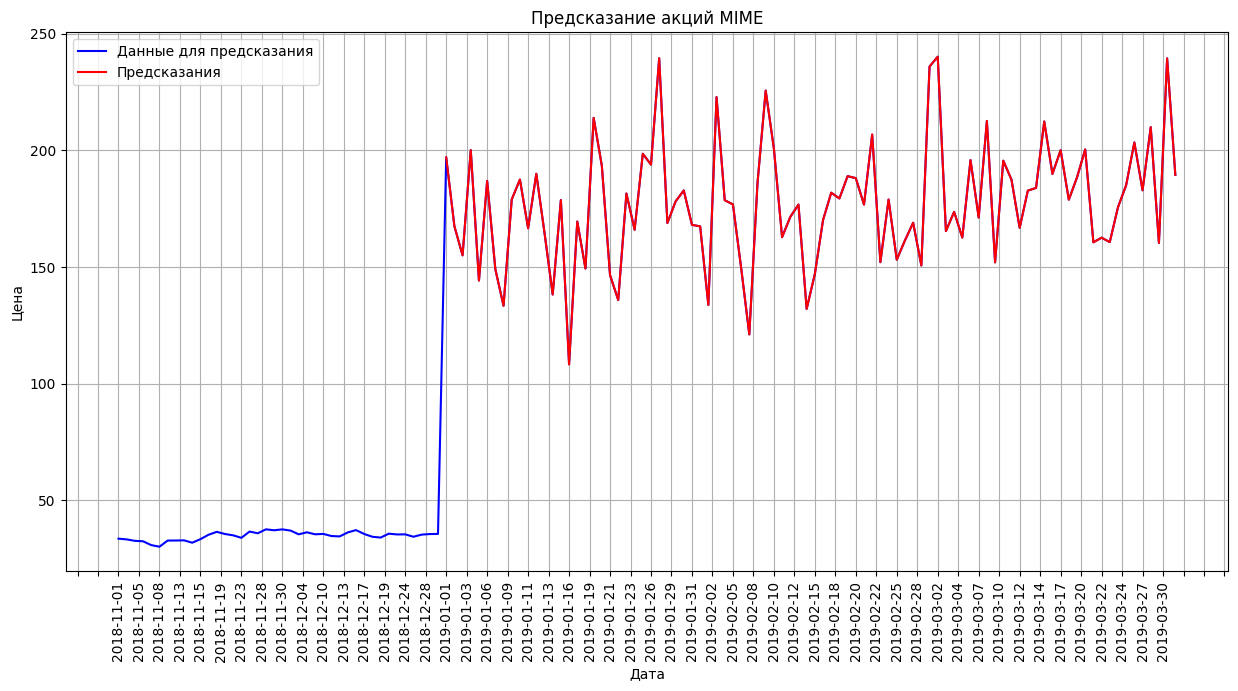

In [260]:
dates_df = df_mime['Date_point']
start_date = dates_df[0]

dates = pd.date_range(start=start_date, periods=91, freq='D')
dates = dates.strftime('%Y-%m-%d').tolist()[1:]

tmp = dates_df.dt.strftime('%Y-%m-%d').tolist()[::-1]

t = []
for i in predict_data_mime['Close']:
  t.append(float(i))
for i in results_mime[0]:
  t.append(float(i))
  
plt.figure(figsize=(15,7)) 
plt.title('Предсказание акций MIME')

plt.plot(tmp+dates, t, color='blue', label='Данные для предсказания')
plt.plot(dates, results_mime[0], color='red', label='Предсказания')

plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(tmp+dates)//2))

plt.gca().set_xlabel('Дата')
plt.gca().set_ylabel('Цена')

plt.grid(True)

plt.legend()
plt.show();

In [261]:
import datetime

query3 = 'INSERT INTO predictions ("company_name", "date_of_predict", "close") VALUES (%s, %s, %s)'
for i in range(len(results_mime[0])):
  name = 'Mimecast Ltd'
  predict_date = datetime.datetime.strptime(dates[i], '%Y-%m-%d')
  close = float(results_mime[0][i])
  cursor.execute(query3, (name, predict_date, close))
connection.commit()